# Equity Analysis with Python - Introduction (Part 1)

__Please install yfinance__ with the following command (Anaconda Prompt/Terminal Window):

pip install yfinance

## yfinance API - first steps

In [117]:
%config IPCompleter.greedy=True

In [118]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [11]:
symbol = "AAPL" # ticker symbol for Apple Inc.

In [12]:
df = yf.download(tickers = symbol, interval = "1d")
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
1980-12-12,0.098834,0.099264,0.098834,0.098834,469033600
1980-12-15,0.093678,0.094108,0.093678,0.094108,175884800
1980-12-16,0.086802,0.087232,0.086802,0.087232,105728000
1980-12-17,0.088951,0.089381,0.088951,0.088951,86441600
1980-12-18,0.091530,0.091959,0.091530,0.091530,73449600
...,...,...,...,...,...
2025-02-03,228.009995,231.830002,225.699997,229.990005,73063300
2025-02-04,232.800003,233.130005,226.649994,227.250000,45067300


In [13]:
df.index

DatetimeIndex(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17',
               '1980-12-18', '1980-12-19', '1980-12-22', '1980-12-23',
               '1980-12-24', '1980-12-26',
               ...
               '2025-01-27', '2025-01-28', '2025-01-29', '2025-01-30',
               '2025-01-31', '2025-02-03', '2025-02-04', '2025-02-05',
               '2025-02-06', '2025-02-07'],
              dtype='datetime64[ns]', name='Date', length=11130, freq=None)

In [14]:
df.index = pd.to_datetime(df.index.date)
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
1980-12-12,0.098834,0.099264,0.098834,0.098834,469033600
1980-12-15,0.093678,0.094108,0.093678,0.094108,175884800
1980-12-16,0.086802,0.087232,0.086802,0.087232,105728000
1980-12-17,0.088951,0.089381,0.088951,0.088951,86441600
1980-12-18,0.091530,0.091959,0.091530,0.091530,73449600
...,...,...,...,...,...
2025-02-03,228.009995,231.830002,225.699997,229.990005,73063300
2025-02-04,232.800003,233.130005,226.649994,227.250000,45067300
2025-02-05,232.470001,232.669998,228.270004,228.529999,39620300


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11130 entries, 1980-12-12 to 2025-02-07
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   11130 non-null  float64
 1   (High, AAPL)    11130 non-null  float64
 2   (Low, AAPL)     11130 non-null  float64
 3   (Open, AAPL)    11130 non-null  float64
 4   (Volume, AAPL)  11130 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 521.7 KB


- __Date__: Date (year-month-day) at midnight New York Time (business daily data without weekends and bank holidays)
- __Open__: daily Open Price @ 9:30 am Eastern TimeZone
- __High__: daily high/max price
- __Low__: daily low/min price
- __Close__: daily Close Price @ 4:00 pm Eastern TimeZone
- __Adj Close__: Close price adjusted for Dividend Payments (backward adjusted)
- __Volume__: daily Trading Volume (number of Shares)

__Price Chart__

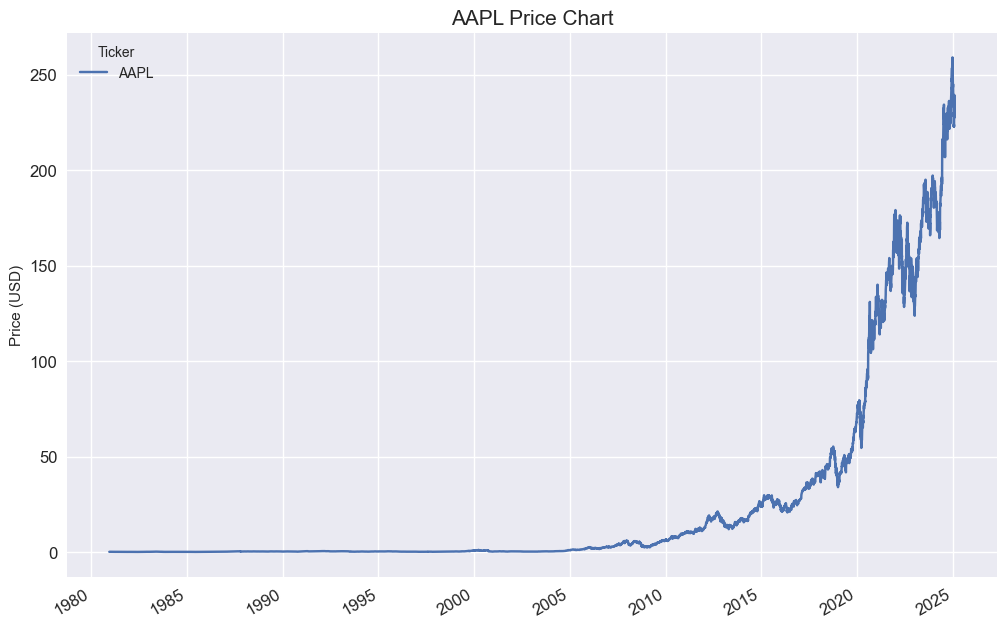

In [16]:
df.Close.plot(figsize = (12, 8), fontsize = 12)
plt.ylabel("Price (USD)")
plt.title("AAPL Price Chart", fontsize = 15)
plt.show()

__Volume Chart__

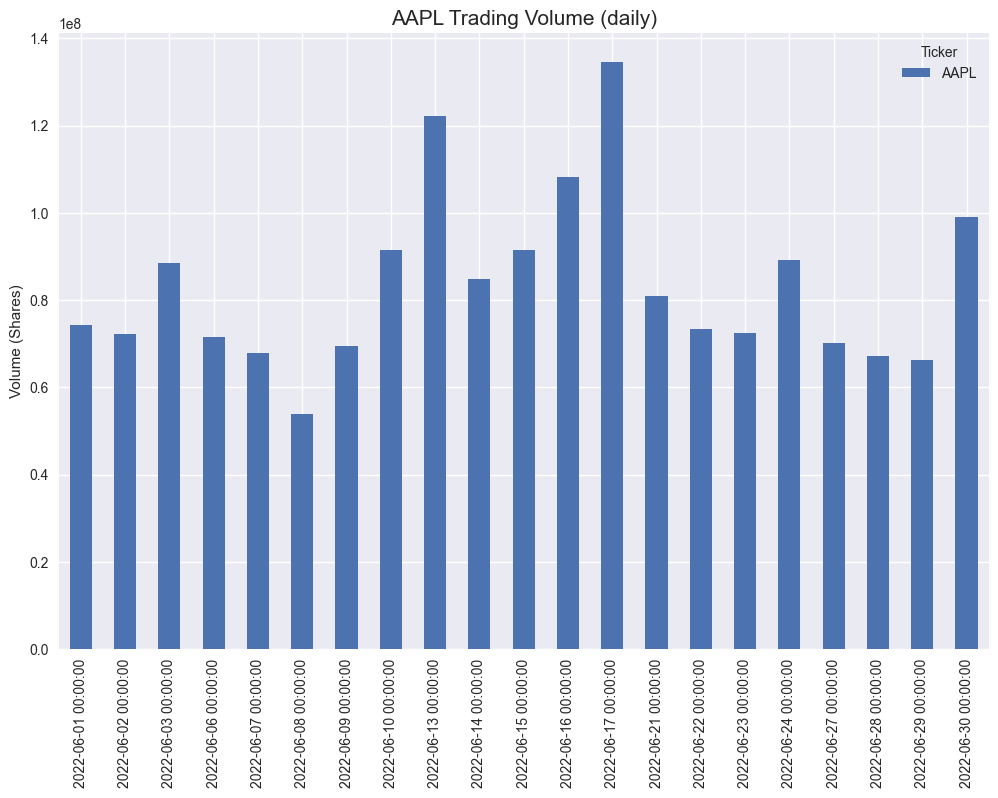

In [17]:
df.loc["2022-6", "Volume"].plot(figsize = (12, 8), kind = "bar")
plt.ylabel("Volume (Shares)")
plt.title("AAPL Trading Volume (daily)", fontsize = 15)
plt.show()

In [18]:
df.Volume.mul(df.Close) # Trading Volume (USD Value)

Ticker,AAPL
1980-12-12,4.635668e+07
1980-12-15,1.647658e+07
1980-12-16,9.177448e+06
1980-12-17,7.689056e+06
1980-12-18,6.722825e+06
...,...
2025-02-03,1.665916e+10
2025-02-04,1.049167e+10
2025-02-05,9.210531e+09
2025-02-06,6.979179e+09


## Excursus: Versions and Updates

Note: From yfinance version 0.2.48, loading one symbol with yf.download() will lead to a Multi Level Index.
To avoid this, set multi_level_index=False

In [19]:
yf.download(tickers = symbol) # creates a Multi Level Index (from yfinance 0.2.48)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
1980-12-12,0.098834,0.099264,0.098834,0.098834,469033600
1980-12-15,0.093678,0.094108,0.093678,0.094108,175884800
1980-12-16,0.086802,0.087232,0.086802,0.087232,105728000
1980-12-17,0.088951,0.089381,0.088951,0.088951,86441600
1980-12-18,0.091530,0.091959,0.091530,0.091530,73449600
...,...,...,...,...,...
2025-02-03,228.009995,231.830002,225.699997,229.990005,73063300
2025-02-04,232.800003,233.130005,226.649994,227.250000,45067300


In [20]:
df = yf.download(tickers = symbol, interval="1d", multi_level_index=False) # avoids Multi Level Index (from yfinance 0.2.48)
df.index = pd.to_datetime(df.index.date)

[*********************100%***********************]  1 of 1 completed


You can get the __latest version__ of yfinance with the following command (Anaconda Prompt/Terminal Window):

pip install yfinance --upgrade

In [21]:
yf.__version__

'0.2.52'

In [22]:
df.index

DatetimeIndex(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17',
               '1980-12-18', '1980-12-19', '1980-12-22', '1980-12-23',
               '1980-12-24', '1980-12-26',
               ...
               '2025-01-27', '2025-01-28', '2025-01-29', '2025-01-30',
               '2025-01-31', '2025-02-03', '2025-02-04', '2025-02-05',
               '2025-02-06', '2025-02-07'],
              dtype='datetime64[ns]', length=11130, freq=None)

## Analysis Period

In [23]:
df

,Close,High,Low,Open,Volume
1980-12-12,0.098834,0.099264,0.098834,0.098834,469033600
1980-12-15,0.093678,0.094108,0.093678,0.094108,175884800
1980-12-16,0.086802,0.087232,0.086802,0.087232,105728000
1980-12-17,0.088951,0.089381,0.088951,0.088951,86441600
1980-12-18,0.091530,0.091959,0.091530,0.091530,73449600
...,...,...,...,...,...
2025-02-03,228.009995,231.830002,225.699997,229.990005,73063300
2025-02-04,232.800003,233.130005,226.649994,227.250000,45067300
2025-02-05,232.470001,232.669998,228.270004,228.529999,39620300
2025-02-06,233.220001,233.800003,230.429993,231.289993,29925300


In [24]:
df.loc["2022-01-01":"2022-01-15"]

,Close,High,Low,Open,Volume
2022-01-03,179.076569,179.932557,174.845883,174.963944,104487900
2022-01-04,176.803833,179.991620,176.233179,179.686619,99310400
2022-01-05,172.100861,177.266248,171.825374,176.715276,94537600
2022-01-06,169.227936,172.474754,168.873737,169.916651,96904000
2022-01-07,169.395203,171.333454,168.273576,170.103600,86709100
2022-01-10,169.414886,169.719888,165.459671,166.355008,106765600
2022-01-11,172.258301,172.356680,168.066963,169.542788,76138300
2022-01-12,172.701019,174.324421,172.002471,173.281507,74805200
2022-01-13,169.414886,173.773483,169.021324,172.947024,84505800
2022-01-14,170.280685,170.979234,168.332586,168.578557,80440800


In [25]:
df.loc["2022"]

,Close,High,Low,Open,Volume
2022-01-03,179.076569,179.932557,174.845883,174.963944,104487900
2022-01-04,176.803833,179.991620,176.233179,179.686619,99310400
2022-01-05,172.100861,177.266248,171.825374,176.715276,94537600
2022-01-06,169.227936,172.474754,168.873737,169.916651,96904000
2022-01-07,169.395203,171.333454,168.273576,170.103600,86709100
...,...,...,...,...,...
2022-12-23,130.487793,131.041963,128.290894,129.557573,63814900
2022-12-27,128.676849,130.042493,127.380484,130.012807,69007800
2022-12-28,124.728371,129.666440,124.560142,128.320592,85438400
2022-12-29,128.261230,129.122172,126.400797,126.658086,75703700


In [26]:
df.loc["2017":]

,Close,High,Low,Open,Volume
2017-01-03,26.891960,26.933635,26.570137,26.810926,115127600
2017-01-04,26.861864,26.975314,26.799352,26.822505,84472400
2017-01-05,26.998463,27.056345,26.813240,26.838708,88774400
2017-01-06,27.299448,27.357330,26.966047,27.037820,127007600
2017-01-09,27.549498,27.651370,27.306394,27.308708,134247600
...,...,...,...,...,...
2025-02-03,228.009995,231.830002,225.699997,229.990005,73063300
2025-02-04,232.800003,233.130005,226.649994,227.250000,45067300
2025-02-05,232.470001,232.669998,228.270004,228.529999,39620300
2025-02-06,233.220001,233.800003,230.429993,231.289993,29925300


In [27]:
df.loc[:, ["Close", "Volume"]]

,Close,Volume
1980-12-12,0.098834,469033600
1980-12-15,0.093678,175884800
1980-12-16,0.086802,105728000
1980-12-17,0.088951,86441600
1980-12-18,0.091530,73449600
...,...,...
2025-02-03,228.009995,73063300
2025-02-04,232.800003,45067300
2025-02-05,232.470001,39620300
2025-02-06,233.220001,29925300


In [28]:
df = yf.download(tickers = symbol, start = "2020-07-01", end = "2020-12-31")
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-07-01,88.698471,89.490182,88.649755,88.944513,110737200
2020-07-02,88.698471,90.247793,88.583985,89.609553,114041600
2020-07-06,91.071159,91.541312,90.101615,90.133285,118655600
2020-07-07,90.788582,92.233149,90.676526,91.451184,112424400
2020-07-08,92.903069,92.934738,91.682613,91.770314,117092000
...,...,...,...,...,...
2020-12-23,128.059875,129.497308,127.883854,129.233298,88223700
2020-12-24,129.047531,130.504541,128.196802,128.411931,54930100


Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max

In [29]:
df = yf.download(tickers = symbol, period = "1mo") # last 30 days
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-01-08,242.699997,243.710007,240.050003,241.919998,37628900
2025-01-10,236.850006,240.160004,233.000000,240.009995,61710900
2025-01-13,234.399994,234.669998,229.720001,233.529999,49630700
2025-01-14,233.279999,236.119995,232.470001,234.750000,39435300
2025-01-15,237.869995,238.960007,234.429993,234.639999,39832000
2025-01-16,228.259995,238.009995,228.029999,237.350006,71759100
2025-01-17,229.979996,232.289993,228.479996,232.119995,68488300
2025-01-21,222.639999,224.419998,219.380005,224.000000,98070400


In [30]:
df = yf.download(tickers = symbol, period = "1y") # last 365 days 
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-02-08,187.401917,188.615955,186.436644,188.466692,40962000
2024-02-09,188.169144,189.305033,187.322202,187.969853,45155200
2024-02-12,186.475266,187.989790,186.116563,187.740691,41781900
2024-02-13,184.372864,185.538659,182.848381,185.100243,56529500
2024-02-14,183.486069,184.861098,181.782242,184.651864,54630500
...,...,...,...,...,...
2025-02-03,228.009995,231.830002,225.699997,229.990005,73063300
2025-02-04,232.800003,233.130005,226.649994,227.250000,45067300


In [31]:
df = yf.download(tickers = symbol, period = "ytd") # year-to-date 
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-01-02,243.850006,249.100006,241.820007,248.929993,55740700
2025-01-03,243.360001,244.179993,241.889999,243.360001,40244100
2025-01-06,245.000000,247.330002,243.199997,244.309998,45045600
2025-01-07,242.210007,245.550003,241.350006,242.979996,40856000
2025-01-08,242.699997,243.710007,240.050003,241.919998,37628900
2025-01-10,236.850006,240.160004,233.000000,240.009995,61710900
2025-01-13,234.399994,234.669998,229.720001,233.529999,49630700
2025-01-14,233.279999,236.119995,232.470001,234.750000,39435300


In [32]:
df = yf.download(tickers = symbol, period = "max") # max
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
1980-12-12,0.098834,0.099264,0.098834,0.098834,469033600
1980-12-15,0.093678,0.094108,0.093678,0.094108,175884800
1980-12-16,0.086802,0.087232,0.086802,0.087232,105728000
1980-12-17,0.088951,0.089381,0.088951,0.088951,86441600
1980-12-18,0.091530,0.091959,0.091530,0.091530,73449600
...,...,...,...,...,...
2025-02-03,228.009995,231.830002,225.699997,229.990005,73063300
2025-02-04,232.800003,233.130005,226.649994,227.250000,45067300


## Data Frequency

Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo <br>
(Intraday data cannot extend last 60 days)

__daily (default)__

In [33]:
df = yf.download(tickers = symbol, interval = "1d")
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
1980-12-12,0.098834,0.099264,0.098834,0.098834,469033600
1980-12-15,0.093678,0.094108,0.093678,0.094108,175884800
1980-12-16,0.086802,0.087232,0.086802,0.087232,105728000
1980-12-17,0.088951,0.089381,0.088951,0.088951,86441600
1980-12-18,0.091530,0.091959,0.091530,0.091530,73449600
...,...,...,...,...,...
2025-02-03,228.009995,231.830002,225.699997,229.990005,73063300
2025-02-04,232.800003,233.130005,226.649994,227.250000,45067300


__monthly__

In [34]:
df = yf.download(tickers = symbol, interval = "1mo")
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
1985-01-01,0.099694,0.106999,0.095827,0.100124,6366416000
1985-02-01,0.085084,0.105710,0.085084,0.099694,4733388800
1985-03-01,0.076059,0.089381,0.071333,0.085084,4615587200
1985-04-01,0.073052,0.079068,0.067466,0.076059,2868028800
1985-05-01,0.059731,0.076489,0.058012,0.073052,4639129600
...,...,...,...,...,...
2024-10-01,225.661728,237.229003,221.086760,229.267761,930736000
2024-11-01,237.069183,237.548652,219.468552,220.727162,891640600


__weekly__

In [35]:
df = yf.download(tickers = symbol, interval = "1wk")
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
1980-12-08,0.098834,0.099264,0.098834,0.098834,469033600
1980-12-15,0.097116,0.097545,0.086802,0.094108,490134400
1980-12-22,0.122039,0.122469,0.101842,0.101842,187891200
1980-12-29,0.118602,0.124188,0.117313,0.123758,219452800
1981-01-05,0.109577,0.116453,0.103992,0.116453,197904000
...,...,...,...,...,...
2025-01-06,236.850006,247.330002,233.000000,244.309998,185241400
2025-01-13,229.979996,238.960007,228.029999,233.529999,269145400


__intraday - 1h__

In [36]:
#df = yf.download(tickers = symbol, interval = "1h")
#df

In [37]:
df = yf.download(tickers = symbol, period = "1y", interval = "1h")
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Datetime,,,,,
2024-02-08 14:30:00+00:00,187.796402,189.535004,187.770004,189.384995,9404735
2024-02-08 15:30:00+00:00,188.005005,188.220001,187.350006,187.800003,5999088
2024-02-08 16:30:00+00:00,188.699997,188.719894,187.934998,187.990707,3704042
2024-02-08 17:30:00+00:00,188.229996,188.750000,188.000000,188.709000,3684608
2024-02-08 18:30:00+00:00,188.020004,188.350006,187.990005,188.229996,2950677
...,...,...,...,...,...
2025-02-07 16:30:00+00:00,228.400604,229.419998,228.195007,229.085007,3763438
2025-02-07 17:30:00+00:00,229.298904,229.440002,228.363297,228.389999,3721234


__intraday - 1m__

In [38]:
#df = yf.download(tickers = symbol, period = "1y", interval = "1m")
#df

In [39]:
# df = yf.download(tickers = symbol, period = "1wk", interval = "1m") # old (1wk deprecated) 
# df

In [40]:
df = yf.download(tickers = symbol, period = "5d", interval = "1m") # new (use 5d instead)
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Datetime,,,,,
2025-02-03 14:30:00+00:00,231.033997,231.470001,229.440002,229.440002,5760545
2025-02-03 14:31:00+00:00,230.850006,231.309998,230.580002,231.009995,445916
2025-02-03 14:32:00+00:00,230.619995,231.070007,230.309998,230.869995,428554
2025-02-03 14:33:00+00:00,230.250000,230.839996,229.860001,230.645004,482868
2025-02-03 14:34:00+00:00,230.072693,230.699997,229.899994,230.229996,420796
...,...,...,...,...,...
2025-02-07 20:55:00+00:00,227.679993,227.830002,227.419998,227.830002,276797
2025-02-07 20:56:00+00:00,227.770004,227.830002,227.619995,227.669998,240697


<Axes: xlabel='Datetime'>

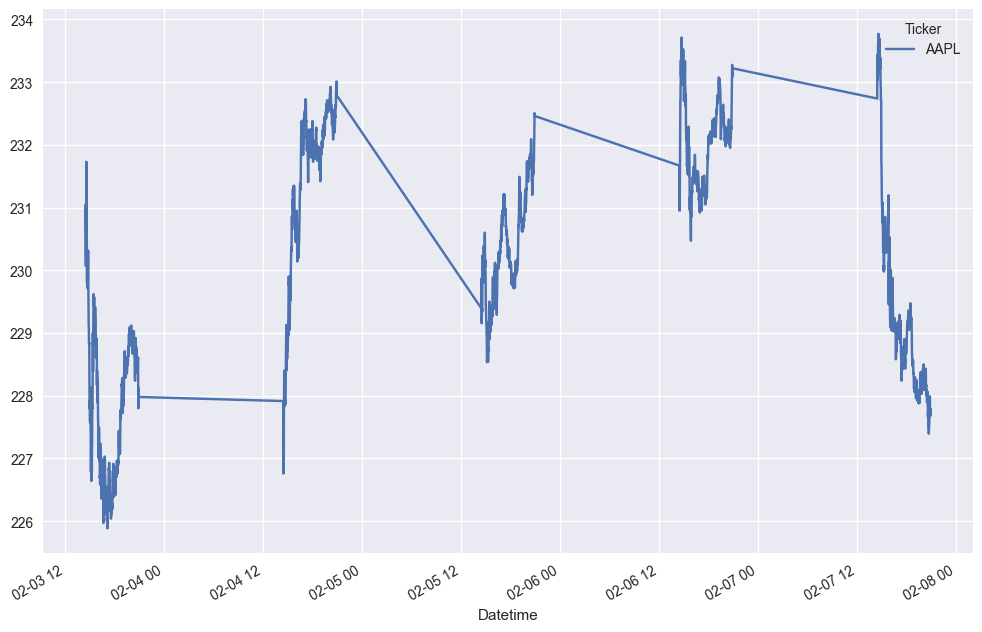

In [41]:
df.loc[:, "Close"].plot(figsize=(12,8))

## Dividends

__Dividend__: A dividend is a __distribution of profits__ by a corporation to its shareholders.

Companies are __free__ to distribute (all / parts / none) of their profits to shareholders (Dividend Payout Policy) 

Dividend Payouts are an import __source of income__ for equity investors.

__Total Return/Profit__ of stocks consists of:
- Stock Price Increase
- Dividend Payouts

- For __innovative & high-growth__ companies, __Stock Price Increase__ is relatively more important.
- For __mature & highly profitable__ companies, __Dividend Payouts__ can be a significant part of Total Return/Profit.

-> __Don´t omit Dividend Payouts__ in your Analysis / Performance Comparison! (otherwise, high-dividend stocks get penalized!)

In [42]:
yf.download(tickers = symbol, actions=True, period="5y")

[*********************100%***********************]  1 of 1 completed


Price,Close,Dividends,High,Low,Open,Stock Splits,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,,
2020-02-07,NaN,0.1925,NaN,NaN,NaN,0.0,0
2020-02-10,78.119240,0.0000,78.119240,76.248561,76.328730,0.0,109348800
2020-02-11,77.647919,0.0000,78.690158,77.429269,78.617278,0.0,94323200
2020-02-12,79.491890,0.0000,79.496746,78.099807,78.099807,0.0,113730400
2020-02-13,78.925819,0.0000,79.253798,78.556544,78.760618,0.0,94747600
...,...,...,...,...,...,...,...
2025-02-03,228.009995,0.0000,231.830002,225.699997,229.990005,0.0,73063300
2025-02-04,232.800003,0.0000,233.130005,226.649994,227.250000,0.0,45067300


In [43]:
pd.read_csv("aapl.csv")

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100039,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094820,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087861,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090035,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092646,73449600,0.0,0.0
...,...,...,...,...,...,...,...,...,...
10550,2022-10-17,141.070007,142.899994,140.270004,142.410004,142.410004,85250900,0.0,0.0
10551,2022-10-18,145.490005,146.699997,140.610001,143.750000,143.750000,99136600,0.0,0.0
10552,2022-10-19,141.690002,144.949997,141.500000,143.860001,143.860001,61758300,0.0,0.0
10553,2022-10-20,143.020004,145.889999,142.649994,143.389999,143.389999,64522000,0.0,0.0


__For this and the next lectures, you have the choice between__
- option 1: working with the same data as in the videos (saved in the csv file aapl.csv) __RECOMMENDED!!!__
- option 2: working with your specific maximum time period

In [44]:
# option 1 -> same data as in video
df = pd.read_csv("aapl.csv", index_col = "Date", parse_dates = ["Date"]) # for more information, see lecture "Saving and Loading Data (Local Files)"  
df

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100039,469033600,0.0,0.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094820,175884800,0.0,0.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087861,105728000,0.0,0.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090035,86441600,0.0,0.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092646,73449600,0.0,0.0
...,...,...,...,...,...,...,...,...
2022-10-17,141.070007,142.899994,140.270004,142.410004,142.410004,85250900,0.0,0.0
2022-10-18,145.490005,146.699997,140.610001,143.750000,143.750000,99136600,0.0,0.0
2022-10-19,141.690002,144.949997,141.500000,143.860001,143.860001,61758300,0.0,0.0


In [45]:
# option 2 -> max period
# df = yf.download(tickers = symbol, actions = True) 
# df

In [46]:
df.loc[df.Dividends != 0]

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1987-05-11,0.343750,0.354911,0.342634,0.343750,0.268340,197276800,0.000536,0.0
1987-08-10,0.430804,0.430804,0.408482,0.430804,0.336732,77996800,0.000536,0.0
1987-11-17,0.328125,0.330357,0.312500,0.312500,0.244794,268800000,0.000714,0.0
1988-02-12,0.362723,0.370536,0.361607,0.366071,0.287323,137760000,0.000714,0.0
1988-05-16,0.361607,0.369420,0.357143,0.368304,0.289648,74760000,0.000714,0.0
...,...,...,...,...,...,...,...,...
2021-08-06,146.350006,147.110001,145.630005,146.139999,145.325668,54126800,0.220000,0.0
2021-11-05,151.889999,152.199997,150.059998,151.279999,150.656570,65463900,0.220000,0.0
2022-02-04,171.679993,174.100006,170.679993,172.389999,171.898315,82465400,0.220000,0.0


In [47]:
df.Dividends.sum() # cumulative Dividends per share

6.603564

In [48]:
# df.Close[-1] - df.Close[0] # cumulative Stock Price Increase - OLD

In [49]:
df.Close.iloc[-1] - df.Close.iloc[0] # cumulative Stock Price Increase - NEW

147.1416562795639

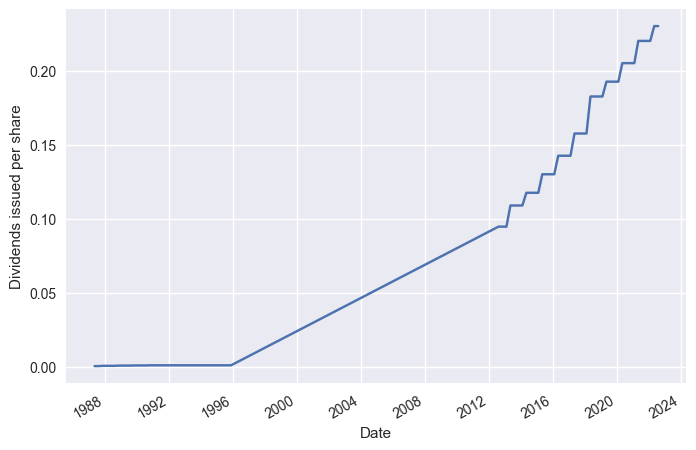

In [50]:
df.loc[df.Dividends != 0].Dividends.plot()
plt.ylabel('Dividends issued per share')
plt.show()

-> AAPL Dividend Policy: 
- historically __low-dividend__ stock (focus on growth) 
- Dividend Payouts __smoothed and steadily growing__ (highly predictable)
- __Avoiding Dividend Cuts__ in less profitable years (negative signal in the market)

## What´s the Adjusted Close Price?

"The Adjusted Close Price is the backward adjusted (reduced) Close Price (adjusted for Dividends)."   

In [51]:
df

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100039,469033600,0.0,0.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094820,175884800,0.0,0.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087861,105728000,0.0,0.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090035,86441600,0.0,0.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092646,73449600,0.0,0.0
...,...,...,...,...,...,...,...,...
2022-10-17,141.070007,142.899994,140.270004,142.410004,142.410004,85250900,0.0,0.0
2022-10-18,145.490005,146.699997,140.610001,143.750000,143.750000,99136600,0.0,0.0
2022-10-19,141.690002,144.949997,141.500000,143.860001,143.860001,61758300,0.0,0.0


In [52]:
df2 = df[["Close", "Adj Close", "Dividends"]].copy()
df2

,Close,Adj Close,Dividends
Date,,,
1980-12-12,0.128348,0.100039,0.0
1980-12-15,0.121652,0.094820,0.0
1980-12-16,0.112723,0.087861,0.0
1980-12-17,0.115513,0.090035,0.0
1980-12-18,0.118862,0.092646,0.0
...,...,...,...
2022-10-17,142.410004,142.410004,0.0
2022-10-18,143.750000,143.750000,0.0
2022-10-19,143.860001,143.860001,0.0


In [53]:
df3 = df2.loc[df2.Dividends!=0]
df3

,Close,Adj Close,Dividends
Date,,,
1987-05-11,0.343750,0.268340,0.000536
1987-08-10,0.430804,0.336732,0.000536
1987-11-17,0.312500,0.244794,0.000714
1988-02-12,0.366071,0.287323,0.000714
1988-05-16,0.368304,0.289648,0.000714
...,...,...,...
2021-08-06,146.139999,145.325668,0.220000
2021-11-05,151.279999,150.656570,0.220000
2022-02-04,172.389999,171.898315,0.220000


In [54]:
df3["Adj Close"].iloc[0]

0.268340140581131

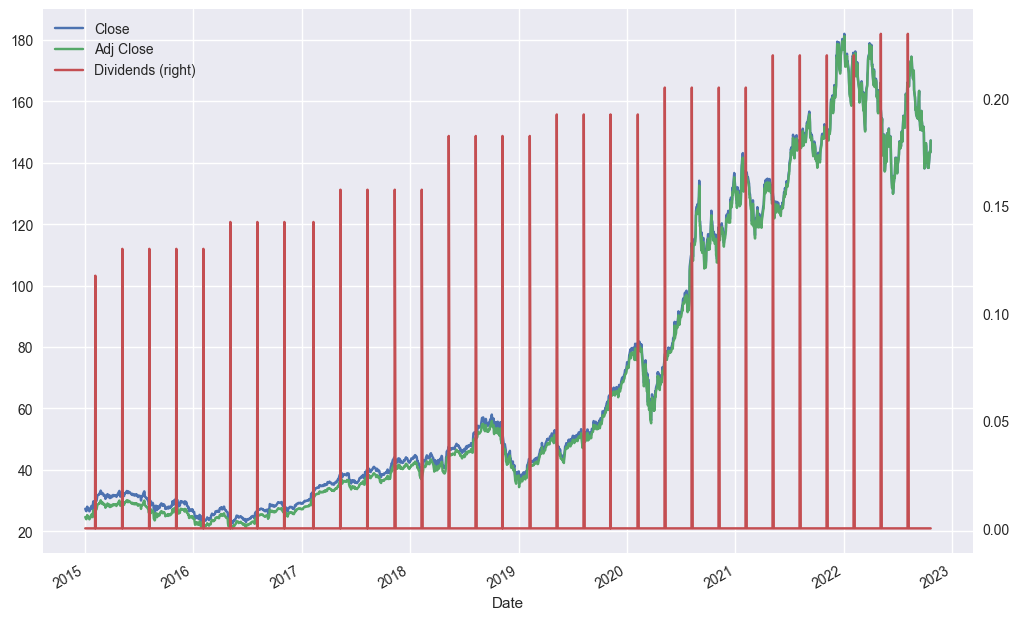

In [55]:
df2.loc["2015":].plot(figsize = (12, 8), secondary_y = "Dividends")
plt.show()

In [56]:
df2[df2.Dividends > 0]

,Close,Adj Close,Dividends
Date,,,
1987-05-11,0.343750,0.268340,0.000536
1987-08-10,0.430804,0.336732,0.000536
1987-11-17,0.312500,0.244794,0.000714
1988-02-12,0.366071,0.287323,0.000714
1988-05-16,0.368304,0.289648,0.000714
...,...,...,...
2021-08-06,146.139999,145.325668,0.220000
2021-11-05,151.279999,150.656570,0.220000
2022-02-04,172.389999,171.898315,0.220000


In [57]:
last_div = df2.loc["2022-08-01": "2022-08-5"].copy()
last_div

,Close,Adj Close,Dividends
Date,,,
2022-08-01,161.509995,161.285965,0.00
2022-08-02,160.009995,159.788040,0.00
2022-08-03,166.130005,165.899567,0.00
2022-08-04,165.809998,165.580002,0.00
2022-08-05,165.350006,165.350006,0.23


In [58]:
last_div.Close - last_div["Adj Close"]

Date
2022-08-01    0.224030
2022-08-02    0.221954
2022-08-03    0.230438
2022-08-04    0.229996
2022-08-05    0.000000
dtype: float64

https://in.help.yahoo.com/kb/adjusted-close-sln28256.html

In [59]:
multiplier = (1 - 0.23/165.809998)
multiplier

0.9986128701358528

In [60]:
last_div

,Close,Adj Close,Dividends
Date,,,
2022-08-01,161.509995,161.285965,0.00
2022-08-02,160.009995,159.788040,0.00
2022-08-03,166.130005,165.899567,0.00
2022-08-04,165.809998,165.580002,0.00
2022-08-05,165.350006,165.350006,0.23


In [61]:
last_div["Adj Close calc"] = last_div.Close * multiplier
last_div

,Close,Adj Close,Dividends,Adj Close calc
Date,,,,
2022-08-01,161.509995,161.285965,0.00,161.285959
2022-08-02,160.009995,159.788040,0.00,159.788040
2022-08-03,166.130005,165.899567,0.00,165.899561
2022-08-04,165.809998,165.580002,0.00,165.579998
2022-08-05,165.350006,165.350006,0.23,165.120644


In [62]:
df["Adj Close"] / df["Close"] # total multiplier (all dividends)

Date
1980-12-12    0.779439
1980-12-15    0.779440
1980-12-16    0.779439
1980-12-17    0.779440
1980-12-18    0.779439
                ...   
2022-10-17    1.000000
2022-10-18    1.000000
2022-10-19    1.000000
2022-10-20    1.000000
2022-10-21    1.000000
Length: 10555, dtype: float64

In [63]:
df

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100039,469033600,0.0,0.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094820,175884800,0.0,0.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087861,105728000,0.0,0.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090035,86441600,0.0,0.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092646,73449600,0.0,0.0
...,...,...,...,...,...,...,...,...
2022-10-17,141.070007,142.899994,140.270004,142.410004,142.410004,85250900,0.0,0.0
2022-10-18,145.490005,146.699997,140.610001,143.750000,143.750000,99136600,0.0,0.0
2022-10-19,141.690002,144.949997,141.500000,143.860001,143.860001,61758300,0.0,0.0


__Interpretations:__
- Borrowing parts (e.g. 22%) of initial stock purchase price in 1980 and pay back borrowed amounts with Dividends. -or-
- Reinvesting Dividends and buying more shares with Dividends

__Benefits:__
- good approximation for a Stock´s __Total Return__ (Price Return + Dividend Yield)
- allows __Performance Comparison__ across stocks with different Payout Policies

## Stock Splits

In [64]:
df

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100039,469033600,0.0,0.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094820,175884800,0.0,0.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087861,105728000,0.0,0.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090035,86441600,0.0,0.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092646,73449600,0.0,0.0
...,...,...,...,...,...,...,...,...
2022-10-17,141.070007,142.899994,140.270004,142.410004,142.410004,85250900,0.0,0.0
2022-10-18,145.490005,146.699997,140.610001,143.750000,143.750000,99136600,0.0,0.0
2022-10-19,141.690002,144.949997,141.500000,143.860001,143.860001,61758300,0.0,0.0


All Prices (OHLC, Adj Close) and Dividends are __backward adjusted__ (reduced) for Stock Splits. 

-> This __makes perfectly sense__ and you should not question it (unless you are interested in historical observable prices)!

In [65]:
splits = df.loc[df["Stock Splits"] > 0]
splits

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1987-06-16,0.370536,0.372768,0.339286,0.370536,0.289250,342720000,0.0,2.0
2000-06-21,0.901786,1.016741,0.898438,0.993304,0.848115,490000000,0.0,2.0
2005-02-28,1.595714,1.612143,1.570000,1.602143,1.367960,651610400,0.0,2.0
2014-06-09,23.174999,23.469999,22.937500,23.424999,20.925592,301660000,0.0,7.0
2020-08-31,127.580002,131.000000,126.000000,129.039993,127.500870,225702700,0.0,4.0


In [66]:
df.loc["2000-06", :]

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2000-06-01,0.729911,0.799665,0.717634,0.795759,0.679444,903840000,0.0,0.0
2000-06-02,0.837054,0.890625,0.794643,0.826451,0.705650,792848000,0.0,0.0
2000-06-05,0.833147,0.850446,0.800781,0.815290,0.696121,323668800,0.0,0.0
2000-06-06,0.821150,0.863839,0.806362,0.829241,0.708033,525481600,0.0,0.0
2000-06-07,0.835938,0.866071,0.818080,0.862165,0.736144,337019200,0.0,0.0
2000-06-08,0.871652,0.879464,0.831473,0.846540,0.722803,238526400,0.0,0.0
2000-06-09,0.863839,0.874442,0.842634,0.854911,0.729950,252358400,0.0,0.0
2000-06-12,0.860491,0.861049,0.811384,0.814174,0.695168,290337600,0.0,0.0
2000-06-13,0.814174,0.845424,0.787388,0.843750,0.720421,351456000,0.0,0.0


__Stock Split__: allows a company to break (split) each share into multiple shares __without affecting its market capitalization (total value of all its shares) or each investor's stake__ in the company. Motivation: reduce price per share and increase granularity.

__Example Stock Split 4:1__ -> Receive 4 new shares for 1 old share. Share Price immediately drops to 1/4 (no value effect)

On Yahoo Finance, Prices & Dividends are backward adjusted for Stock Splits. 

Price on 2020-08-31 __after Split__:

In [67]:
splits.loc["2020-08-31", "Close"] 

129.0399932861328

Price on 2020-08-31 __before Split__:

In [68]:
splits.loc["2020-08-31", "Close"] * splits.loc["2020-08-31", "Stock Splits"]

516.1599731445312

__-> 4 * 129 == 1 * 516__

In [69]:
splits.loc["2020-08-31", "Low"]

126.0

__Calculate the unadjusted (observable) prices__

In [70]:
df["Stock Splits"].replace(to_replace = 0, value = 1, inplace = True) # 1:1 on all other days
df

/var/folders/ql/639_js492lngtxxh_xl4npgc0000gn/T/ipykernel_88300/1162197168.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Stock Splits"].replace(to_replace = 0, value = 1, inplace = True) # 1:1 on all other days


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100039,469033600,0.0,1.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094820,175884800,0.0,1.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087861,105728000,0.0,1.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090035,86441600,0.0,1.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092646,73449600,0.0,1.0
...,...,...,...,...,...,...,...,...
2022-10-17,141.070007,142.899994,140.270004,142.410004,142.410004,85250900,0.0,1.0
2022-10-18,145.490005,146.699997,140.610001,143.750000,143.750000,99136600,0.0,1.0
2022-10-19,141.690002,144.949997,141.500000,143.860001,143.860001,61758300,0.0,1.0


In [71]:
df.sort_index(ascending=False)

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2022-10-21,142.869995,147.850006,142.649994,147.270004,147.270004,86464700,0.0,1.0
2022-10-20,143.020004,145.889999,142.649994,143.389999,143.389999,64522000,0.0,1.0
2022-10-19,141.690002,144.949997,141.500000,143.860001,143.860001,61758300,0.0,1.0
2022-10-18,145.490005,146.699997,140.610001,143.750000,143.750000,99136600,0.0,1.0
2022-10-17,141.070007,142.899994,140.270004,142.410004,142.410004,85250900,0.0,1.0
...,...,...,...,...,...,...,...,...
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092646,73449600,0.0,1.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090035,86441600,0.0,1.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087861,105728000,0.0,1.0


In [72]:
df["Multiplier"] = df.sort_index(ascending = False)["Stock Splits"].cumprod() # cumulative multipier
df

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Multiplier
Date,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100039,469033600,0.0,1.0,224.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094820,175884800,0.0,1.0,224.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087861,105728000,0.0,1.0,224.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090035,86441600,0.0,1.0,224.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092646,73449600,0.0,1.0,224.0
...,...,...,...,...,...,...,...,...,...
2022-10-17,141.070007,142.899994,140.270004,142.410004,142.410004,85250900,0.0,1.0,1.0
2022-10-18,145.490005,146.699997,140.610001,143.750000,143.750000,99136600,0.0,1.0,1.0
2022-10-19,141.690002,144.949997,141.500000,143.860001,143.860001,61758300,0.0,1.0,1.0


In [73]:
df["Close_unadj"] = df["Close"] * df.Multiplier # observable close price
df

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Multiplier,Close_unadj
Date,,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100039,469033600,0.0,1.0,224.0,28.749950
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094820,175884800,0.0,1.0,224.0,27.250048
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087861,105728000,0.0,1.0,224.0,25.249952
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090035,86441600,0.0,1.0,224.0,25.874911
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092646,73449600,0.0,1.0,224.0,26.625089
...,...,...,...,...,...,...,...,...,...,...
2022-10-17,141.070007,142.899994,140.270004,142.410004,142.410004,85250900,0.0,1.0,1.0,142.410004
2022-10-18,145.490005,146.699997,140.610001,143.750000,143.750000,99136600,0.0,1.0,1.0,143.750000
2022-10-19,141.690002,144.949997,141.500000,143.860001,143.860001,61758300,0.0,1.0,1.0,143.860001


In [74]:
df

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Multiplier,Close_unadj
Date,,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100039,469033600,0.0,1.0,224.0,28.749950
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094820,175884800,0.0,1.0,224.0,27.250048
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087861,105728000,0.0,1.0,224.0,25.249952
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090035,86441600,0.0,1.0,224.0,25.874911
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092646,73449600,0.0,1.0,224.0,26.625089
...,...,...,...,...,...,...,...,...,...,...
2022-10-17,141.070007,142.899994,140.270004,142.410004,142.410004,85250900,0.0,1.0,1.0,142.410004
2022-10-18,145.490005,146.699997,140.610001,143.750000,143.750000,99136600,0.0,1.0,1.0,143.750000
2022-10-19,141.690002,144.949997,141.500000,143.860001,143.860001,61758300,0.0,1.0,1.0,143.860001


__-> (backward adjusted) prices correctly reflect true price performance. They ignore price drops caused by stock splits!__

__unadjusted Dividends__

In [75]:
df["div_unadj"] = df["Dividends"] * df.Multiplier

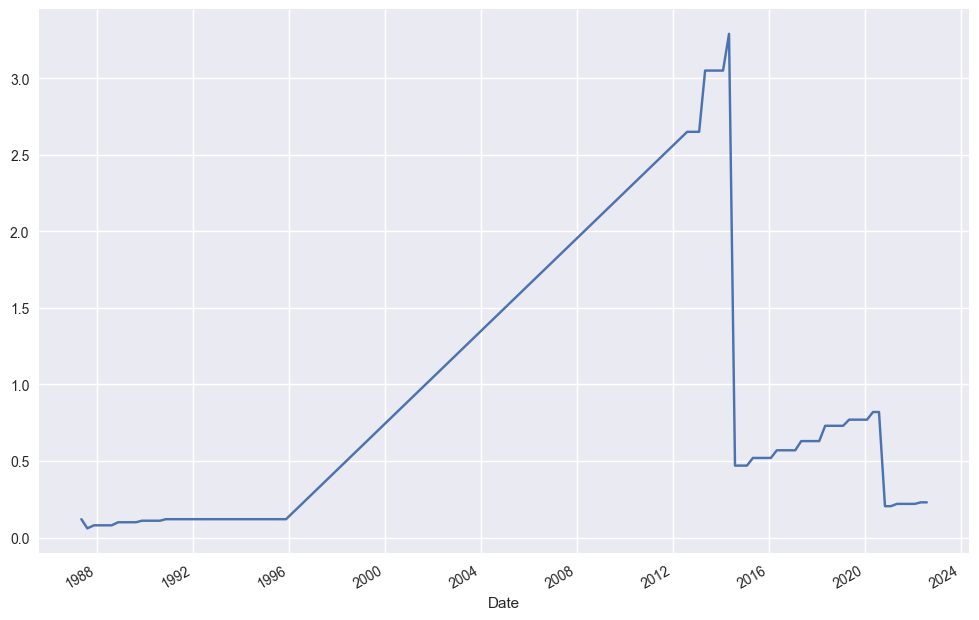

In [76]:
df.loc[df.div_unadj != 0].div_unadj.plot(figsize = (12, 8))
plt.show()

__unadjusted Trading Volume (number of shares)__

In [77]:
df["Volume_unadj"] = df["Volume"] / df.Multiplier

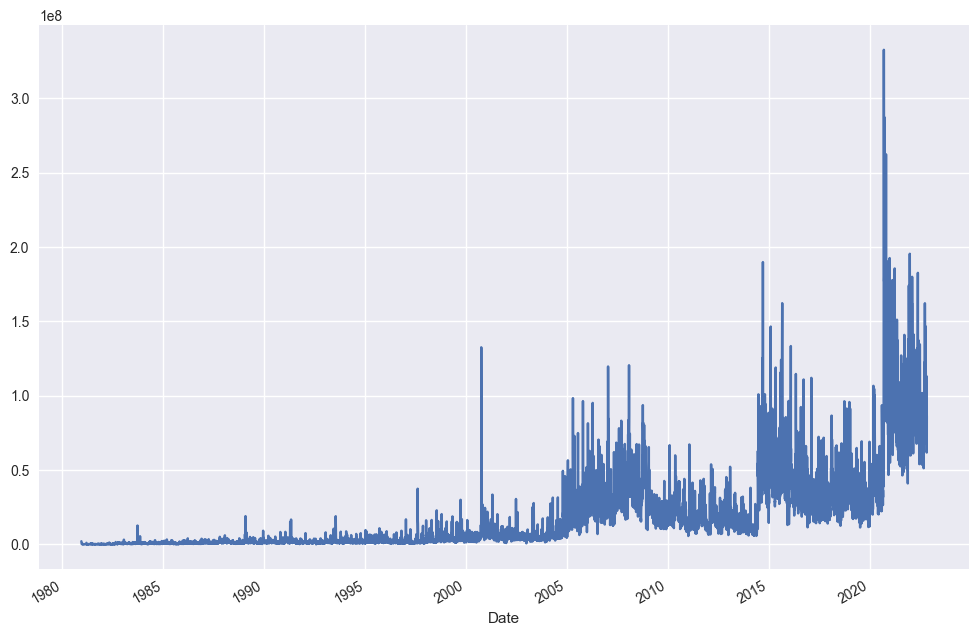

In [78]:
df["Volume_unadj"].plot(figsize = (12, 8))
plt.show()

## Stocks from other Countries / Exchanges 

In [79]:
yf.download(tickers = "AAPL") # US Ticker (no suffix)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
1980-12-12,0.098834,0.099264,0.098834,0.098834,469033600
1980-12-15,0.093678,0.094108,0.093678,0.094108,175884800
1980-12-16,0.086802,0.087232,0.086802,0.087232,105728000
1980-12-17,0.088951,0.089381,0.088951,0.088951,86441600
1980-12-18,0.091530,0.091959,0.091530,0.091530,73449600
...,...,...,...,...,...
2025-02-03,228.009995,231.830002,225.699997,229.990005,73063300
2025-02-04,232.800003,233.130005,226.649994,227.250000,45067300


In [80]:
#yf.download(tickers = "RELIANCE") # Indian Ticker (no suffix)

__Exchange List:__ 

https://help.yahoo.com/kb/SLN2310.html

In [81]:
yf.download(tickers = "RELIANCE.NS") # Indian Ticker

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
1996-01-01,3.343181,3.348868,3.309059,3.330995,104121369
1996-01-02,3.317184,3.351306,3.292811,3.335058,168743308
1996-01-03,3.342370,3.525168,3.335058,3.371617,209323879
1996-01-04,3.311496,3.321245,3.266812,3.310684,216900264
1996-01-05,3.288749,3.298498,3.260313,3.298498,166708467
...,...,...,...,...,...
2025-02-03,1245.900024,1256.000000,1237.550049,1251.000000,9252345
2025-02-04,1285.199951,1288.800049,1246.599976,1248.050049,16691069


In [82]:
yf.download(tickers = "LHA.DE") # German Ticker (Deutsche Boerse XETRA)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,LHA.DE,LHA.DE,LHA.DE,LHA.DE,LHA.DE
Date,,,,,
1996-12-16,4.093604,4.217714,4.055589,4.167679,1066584
1996-12-17,4.177701,4.181694,4.043569,4.073598,1052852
1996-12-18,4.149668,4.281764,4.129662,4.183690,1332249
1996-12-19,4.195711,4.219710,4.133656,4.133656,594524
1996-12-20,4.123633,4.243749,4.103627,4.193714,763507
...,...,...,...,...,...
2025-02-03,6.248000,6.264000,6.050000,6.080000,5913470
2025-02-04,6.182000,6.270000,6.182000,6.250000,5092217


In [83]:
yf.download(tickers = "LHA.F") # German Ticker (Frankfurt Stock Exchange)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,LHA.F,LHA.F,LHA.F,LHA.F,LHA.F
Date,,,,,
2000-01-03,10.004571,10.697529,10.004571,10.437670,443367
2000-01-04,9.961261,10.134499,9.701402,10.004570,682847
2000-01-05,9.723057,9.896296,9.441544,9.636438,507406
2000-01-06,10.307740,10.372705,9.658093,9.744713,323837
2000-01-07,10.351049,10.372704,10.004571,10.177810,383812
...,...,...,...,...,...
2025-02-03,6.240000,6.250000,6.002000,6.002000,21685
2025-02-04,6.178000,6.296000,6.172000,6.268000,21259


## Multiple Tickers

In [84]:
df = yf.download(tickers = ["AAPL", "MSFT"]) # multiple tickers
df

[*********************100%***********************]  2 of 2 completed


Price            Close                    High                     Low  \
Ticker            AAPL        MSFT        AAPL        MSFT        AAPL   
Date                                                                     
1980-12-12    0.098834         NaN    0.099264         NaN    0.098834   
1980-12-15    0.093678         NaN    0.094108         NaN    0.093678   
1980-12-16    0.086802         NaN    0.087232         NaN    0.086802   
1980-12-17    0.088951         NaN    0.089381         NaN    0.088951   
1980-12-18    0.091530         NaN    0.091959         NaN    0.091530   
...                ...         ...         ...         ...         ...   
2025-02-03  228.009995  410.920013  231.830002  415.410004  225.699997   
2025-02-04  232.800003  412.369995  233.130005  413.920013  226.649994   
2025-02-05  232.470001  413.290009  232.669998  413.829987  228.270004   
2025-02-06  233.220001  415.820007  233.800003  418.200012  230.429993   
2025-02-07  227.630005  409.750000  234.000000  418.649994  227.259995   

Price                         Open                 Volume              
Ticker            MSFT        AAPL        MSFT       AAPL        MSFT  
Date                                                                   
1980-12-12         NaN    0.098834         NaN  469033600         NaN  
1980-12-15         NaN    0.094108         NaN  175884800         NaN  
1980-12-16         NaN    0.087232         NaN  105728000         NaN  
1980-12-17         NaN    0.088951         NaN   86441600         NaN  
1980-12-18         NaN    0.091530         NaN   73449600         NaN  
...                ...         ...         ...        ...         ...  
2025-02-03  408.660004  229.990005  411.600006   73063300  25679100.0  
2025-02-04  409.739990  227.250000  412.690002   45067300  20532100.0  
2025-02-05  410.399994  228.529999  412.350006   39620300  16316700.0  
2025-02-06  414.000000  231.289993  414.000000   29925300  16309800.0  
2025-02-07  408.100006  232.600006  416.480011   39666100  22860700.0  

[11130 rows x 10 columns]

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11130 entries, 1980-12-12 to 2025-02-07
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   11130 non-null  float64
 1   (Close, MSFT)   9804 non-null   float64
 2   (High, AAPL)    11130 non-null  float64
 3   (High, MSFT)    9804 non-null   float64
 4   (Low, AAPL)     11130 non-null  float64
 5   (Low, MSFT)     9804 non-null   float64
 6   (Open, AAPL)    11130 non-null  float64
 7   (Open, MSFT)    9804 non-null   float64
 8   (Volume, AAPL)  11130 non-null  int64  
 9   (Volume, MSFT)  9804 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 956.5 KB


In [86]:
df.columns

MultiIndex([( 'Close', 'AAPL'),
            ( 'Close', 'MSFT'),
            (  'High', 'AAPL'),
            (  'High', 'MSFT'),
            (   'Low', 'AAPL'),
            (   'Low', 'MSFT'),
            (  'Open', 'AAPL'),
            (  'Open', 'MSFT'),
            ('Volume', 'AAPL'),
            ('Volume', 'MSFT')],
           names=['Price', 'Ticker'])

In [87]:
df.Close # outer index level

Ticker,AAPL,MSFT
Date,,
1980-12-12,0.098834,NaN
1980-12-15,0.093678,NaN
1980-12-16,0.086802,NaN
1980-12-17,0.088951,NaN
1980-12-18,0.091530,NaN
...,...,...
2025-02-03,228.009995,410.920013
2025-02-04,232.800003,412.369995
2025-02-05,232.470001,413.290009


In [88]:
df.loc[:, ("Close", "MSFT")] # one specific column

Date
1980-12-12           NaN
1980-12-15           NaN
1980-12-16           NaN
1980-12-17           NaN
1980-12-18           NaN
                 ...    
2025-02-03    410.920013
2025-02-04    412.369995
2025-02-05    413.290009
2025-02-06    415.820007
2025-02-07    409.750000
Name: (Close, MSFT), Length: 11130, dtype: float64

In [89]:
df.Close.MSFT # one specific column

Date
1980-12-12           NaN
1980-12-15           NaN
1980-12-16           NaN
1980-12-17           NaN
1980-12-18           NaN
                 ...    
2025-02-03    410.920013
2025-02-04    412.369995
2025-02-05    413.290009
2025-02-06    415.820007
2025-02-07    409.750000
Name: MSFT, Length: 11130, dtype: float64

In [90]:
df.loc[:, (slice(None), slice("AAPL"))] # inner index level

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
1980-12-12,0.098834,0.099264,0.098834,0.098834,469033600
1980-12-15,0.093678,0.094108,0.093678,0.094108,175884800
1980-12-16,0.086802,0.087232,0.086802,0.087232,105728000
1980-12-17,0.088951,0.089381,0.088951,0.088951,86441600
1980-12-18,0.091530,0.091959,0.091530,0.091530,73449600
...,...,...,...,...,...
2025-02-03,228.009995,231.830002,225.699997,229.990005,73063300
2025-02-04,232.800003,233.130005,226.649994,227.250000,45067300


In [91]:
df = df.swaplevel(axis = "columns").sort_index(axis = "columns")
df

Ticker            AAPL                                                 \
Price            Close        High         Low        Open     Volume   
Date                                                                    
1980-12-12    0.098834    0.099264    0.098834    0.098834  469033600   
1980-12-15    0.093678    0.094108    0.093678    0.094108  175884800   
1980-12-16    0.086802    0.087232    0.086802    0.087232  105728000   
1980-12-17    0.088951    0.089381    0.088951    0.088951   86441600   
1980-12-18    0.091530    0.091959    0.091530    0.091530   73449600   
...                ...         ...         ...         ...        ...   
2025-02-03  228.009995  231.830002  225.699997  229.990005   73063300   
2025-02-04  232.800003  233.130005  226.649994  227.250000   45067300   
2025-02-05  232.470001  232.669998  228.270004  228.529999   39620300   
2025-02-06  233.220001  233.800003  230.429993  231.289993   29925300   
2025-02-07  227.630005  234.000000  227.259995  232.600006   39666100   

Ticker            MSFT                                                  
Price            Close        High         Low        Open      Volume  
Date                                                                    
1980-12-12         NaN         NaN         NaN         NaN         NaN  
1980-12-15         NaN         NaN         NaN         NaN         NaN  
1980-12-16         NaN         NaN         NaN         NaN         NaN  
1980-12-17         NaN         NaN         NaN         NaN         NaN  
1980-12-18         NaN         NaN         NaN         NaN         NaN  
...                ...         ...         ...         ...         ...  
2025-02-03  410.920013  415.410004  408.660004  411.600006  25679100.0  
2025-02-04  412.369995  413.920013  409.739990  412.690002  20532100.0  
2025-02-05  413.290009  413.829987  410.399994  412.350006  16316700.0  
2025-02-06  415.820007  418.200012  414.000000  414.000000  16309800.0  
2025-02-07  409.750000  418.649994  408.100006  416.480011  22860700.0  

[11130 rows x 10 columns]

In [92]:
df.AAPL

Price,Close,High,Low,Open,Volume
Date,,,,,
1980-12-12,0.098834,0.099264,0.098834,0.098834,469033600
1980-12-15,0.093678,0.094108,0.093678,0.094108,175884800
1980-12-16,0.086802,0.087232,0.086802,0.087232,105728000
1980-12-17,0.088951,0.089381,0.088951,0.088951,86441600
1980-12-18,0.091530,0.091959,0.091530,0.091530,73449600
...,...,...,...,...,...
2025-02-03,228.009995,231.830002,225.699997,229.990005,73063300
2025-02-04,232.800003,233.130005,226.649994,227.250000,45067300
2025-02-05,232.470001,232.669998,228.270004,228.529999,39620300


In [93]:
df = yf.download(tickers = ["LHA.F", "LHA.DE"]).Close
df

[*********************100%***********************]  2 of 2 completed


Ticker,LHA.DE,LHA.F
Date,,
1996-12-16,4.093603,NaN
1996-12-17,4.177700,NaN
1996-12-18,4.149669,NaN
1996-12-19,4.195710,NaN
1996-12-20,4.123634,NaN
...,...,...
2025-02-03,6.248000,6.240
2025-02-04,6.182000,6.178
2025-02-05,6.252000,6.220


In [94]:
#df.LHA.F # incorrect

In [95]:
df["LHA.F"]

Date
1996-12-16      NaN
1996-12-17      NaN
1996-12-18      NaN
1996-12-19      NaN
1996-12-20      NaN
              ...  
2025-02-03    6.240
2025-02-04    6.178
2025-02-05    6.220
2025-02-06    6.548
2025-02-07    6.672
Name: LHA.F, Length: 7217, dtype: float64

In [96]:
df.columns = ["LHA_DE", "LHA_F"]

In [97]:
df

,LHA_DE,LHA_F
Date,,
1996-12-16,4.093603,NaN
1996-12-17,4.177700,NaN
1996-12-18,4.149669,NaN
1996-12-19,4.195710,NaN
1996-12-20,4.123634,NaN
...,...,...
2025-02-03,6.248000,6.240
2025-02-04,6.182000,6.178
2025-02-05,6.252000,6.220


In [98]:
df.LHA_F

Date
1996-12-16      NaN
1996-12-17      NaN
1996-12-18      NaN
1996-12-19      NaN
1996-12-20      NaN
              ...  
2025-02-03    6.240
2025-02-04    6.178
2025-02-05    6.220
2025-02-06    6.548
2025-02-07    6.672
Name: LHA_F, Length: 7217, dtype: float64

## Saving and Loading Data (Local Files)

In [99]:
import yfinance as yf
import pandas as pd

In [100]:
symbol = "AAPL"

In [101]:
df = yf.download(symbol, multi_level_index = False) # use multi_level_index: this simplifies the next steps
df

[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
1980-12-12,0.098834,0.099264,0.098834,0.098834,469033600
1980-12-15,0.093678,0.094108,0.093678,0.094108,175884800
1980-12-16,0.086802,0.087232,0.086802,0.087232,105728000
1980-12-17,0.088951,0.089381,0.088951,0.088951,86441600
1980-12-18,0.091530,0.091959,0.091530,0.091530,73449600
...,...,...,...,...,...
2025-02-03,228.009995,231.830002,225.699997,229.990005,73063300
2025-02-04,232.800003,233.130005,226.649994,227.250000,45067300
2025-02-05,232.470001,232.669998,228.270004,228.529999,39620300


In [102]:
df.to_csv(path_or_buf = "apple.csv") # writing to local csv

In [103]:
df2 = pd.read_csv("apple.csv", index_col="Date", parse_dates= ["Date"]) # loading from local csv
df2

,Close,High,Low,Open,Volume
Date,,,,,
1980-12-12,0.098834,0.099264,0.098834,0.098834,469033600
1980-12-15,0.093678,0.094108,0.093678,0.094108,175884800
1980-12-16,0.086802,0.087232,0.086802,0.087232,105728000
1980-12-17,0.088951,0.089381,0.088951,0.088951,86441600
1980-12-18,0.091530,0.091959,0.091530,0.091530,73449600
...,...,...,...,...,...
2025-02-03,228.009995,231.830002,225.699997,229.990005,73063300
2025-02-04,232.800003,233.130005,226.649994,227.250000,45067300
2025-02-05,232.470001,232.669998,228.270004,228.529999,39620300


In [104]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11130 entries, 1980-12-12 to 2025-02-07
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   11130 non-null  float64
 1   High    11130 non-null  float64
 2   Low     11130 non-null  float64
 3   Open    11130 non-null  float64
 4   Volume  11130 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 521.7 KB


__multiple symbols__

In [105]:
symbols = ["AAPL", "MSFT"]

In [106]:
df = yf.download(symbols)
df

[*********************100%***********************]  2 of 2 completed


Price            Close                    High                     Low  \
Ticker            AAPL        MSFT        AAPL        MSFT        AAPL   
Date                                                                     
1980-12-12    0.098834         NaN    0.099264         NaN    0.098834   
1980-12-15    0.093678         NaN    0.094108         NaN    0.093678   
1980-12-16    0.086802         NaN    0.087232         NaN    0.086802   
1980-12-17    0.088951         NaN    0.089381         NaN    0.088951   
1980-12-18    0.091530         NaN    0.091959         NaN    0.091530   
...                ...         ...         ...         ...         ...   
2025-02-03  228.009995  410.920013  231.830002  415.410004  225.699997   
2025-02-04  232.800003  412.369995  233.130005  413.920013  226.649994   
2025-02-05  232.470001  413.290009  232.669998  413.829987  228.270004   
2025-02-06  233.220001  415.820007  233.800003  418.200012  230.429993   
2025-02-07  227.630005  409.750000  234.000000  418.649994  227.259995   

Price                         Open                 Volume              
Ticker            MSFT        AAPL        MSFT       AAPL        MSFT  
Date                                                                   
1980-12-12         NaN    0.098834         NaN  469033600         NaN  
1980-12-15         NaN    0.094108         NaN  175884800         NaN  
1980-12-16         NaN    0.087232         NaN  105728000         NaN  
1980-12-17         NaN    0.088951         NaN   86441600         NaN  
1980-12-18         NaN    0.091530         NaN   73449600         NaN  
...                ...         ...         ...        ...         ...  
2025-02-03  408.660004  229.990005  411.600006   73063300  25679100.0  
2025-02-04  409.739990  227.250000  412.690002   45067300  20532100.0  
2025-02-05  410.399994  228.529999  412.350006   39620300  16316700.0  
2025-02-06  414.000000  231.289993  414.000000   29925300  16309800.0  
2025-02-07  408.100006  232.600006  416.480011   39666100  22860700.0  

[11130 rows x 10 columns]

In [107]:
df.to_csv(path_or_buf = "two_stocks.csv") # writing to local csv

In [108]:
df2 = pd.read_csv("two_stocks.csv", header = [0, 1], index_col = [0], parse_dates = [0]) # loading from local csv
df2

Price            Close                    High                     Low  \
Ticker            AAPL        MSFT        AAPL        MSFT        AAPL   
Date                                                                     
1980-12-12    0.098834         NaN    0.099264         NaN    0.098834   
1980-12-15    0.093678         NaN    0.094108         NaN    0.093678   
1980-12-16    0.086802         NaN    0.087232         NaN    0.086802   
1980-12-17    0.088951         NaN    0.089381         NaN    0.088951   
1980-12-18    0.091530         NaN    0.091959         NaN    0.091530   
...                ...         ...         ...         ...         ...   
2025-02-03  228.009995  410.920013  231.830002  415.410004  225.699997   
2025-02-04  232.800003  412.369995  233.130005  413.920013  226.649994   
2025-02-05  232.470001  413.290009  232.669998  413.829987  228.270004   
2025-02-06  233.220001  415.820007  233.800003  418.200012  230.429993   
2025-02-07  227.630005  409.750000  234.000000  418.649994  227.259995   

Price                         Open                 Volume              
Ticker            MSFT        AAPL        MSFT       AAPL        MSFT  
Date                                                                   
1980-12-12         NaN    0.098834         NaN  469033600         NaN  
1980-12-15         NaN    0.094108         NaN  175884800         NaN  
1980-12-16         NaN    0.087232         NaN  105728000         NaN  
1980-12-17         NaN    0.088951         NaN   86441600         NaN  
1980-12-18         NaN    0.091530         NaN   73449600         NaN  
...                ...         ...         ...        ...         ...  
2025-02-03  408.660004  229.990005  411.600006   73063300  25679100.0  
2025-02-04  409.739990  227.250000  412.690002   45067300  20532100.0  
2025-02-05  410.399994  228.529999  412.350006   39620300  16316700.0  
2025-02-06  414.000000  231.289993  414.000000   29925300  16309800.0  
2025-02-07  408.100006  232.600006  416.480011   39666100  22860700.0  

[11130 rows x 10 columns]

In [109]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11130 entries, 1980-12-12 to 2025-02-07
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   11130 non-null  float64
 1   (Close, MSFT)   9804 non-null   float64
 2   (High, AAPL)    11130 non-null  float64
 3   (High, MSFT)    9804 non-null   float64
 4   (Low, AAPL)     11130 non-null  float64
 5   (Low, MSFT)     9804 non-null   float64
 6   (Open, AAPL)    11130 non-null  float64
 7   (Open, MSFT)    9804 non-null   float64
 8   (Volume, AAPL)  11130 non-null  int64  
 9   (Volume, MSFT)  9804 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 956.5 KB


## Coding Challenge

1. Load historical Prices, Volume and Dividends for the stocks "JNJ" (__Johnson & Johnson__) and "TSLA" (__Tesla__)

2. Analyze and compare Dividends, Stock Price Increase and Dividend Policy

3. Which stock is the high-dividend stock?

## --------------- Solution --------------------------

In [110]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [111]:
symbols = ["JNJ", "TSLA"]

In [112]:
df = yf.download(symbols, actions = True)
df

[*********************100%***********************]  2 of 2 completed


Price            Close             Dividends             High              \
Ticker             JNJ        TSLA       JNJ TSLA         JNJ        TSLA   
Date                                                                        
1962-01-02    0.062519         NaN       0.0  NaN    0.062519         NaN   
1962-01-03    0.061547         NaN       0.0  NaN    0.061871         NaN   
1962-01-04    0.060899         NaN       0.0  NaN    0.061871         NaN   
1962-01-05    0.059927         NaN       0.0  NaN    0.060413         NaN   
1962-01-08    0.058956         NaN       0.0  NaN    0.059441         NaN   
...                ...         ...       ...  ...         ...         ...   
2025-02-03  151.869995  383.679993       0.0  0.0  152.470001  389.170013   
2025-02-04  153.490005  392.209991       0.0  0.0  154.179993  394.000000   
2025-02-05  154.690002  378.170013       0.0  0.0  154.729996  388.390015   
2025-02-06  153.509995  374.320007       0.0  0.0  154.839996  375.399994   
2025-02-07  153.119995  361.619995       0.0  0.0  154.490005  380.549988   

Price              Low                    Open             Stock Splits       \
Ticker             JNJ        TSLA         JNJ        TSLA          JNJ TSLA   
Date                                                                           
1962-01-02    0.062195         NaN    0.000000         NaN          0.0  NaN   
1962-01-03    0.061547         NaN    0.000000         NaN          0.0  NaN   
1962-01-04    0.060899         NaN    0.000000         NaN          0.0  NaN   
1962-01-05    0.059927         NaN    0.000000         NaN          0.0  NaN   
1962-01-08    0.058956         NaN    0.000000         NaN          0.0  NaN   
...                ...         ...         ...         ...          ...  ...   
2025-02-03  150.779999  374.359985  152.000000  386.679993          0.0  0.0   
2025-02-04  150.949997  381.399994  151.360001  382.630005          0.0  0.0   
2025-02-05  153.309998  375.529999  153.820007  387.510010          0.0  0.0   
2025-02-06  153.380005  363.179993  154.789993  373.029999          0.0  0.0   
2025-02-07  152.800003  360.339996  153.529999  370.190002          0.0  0.0   

Price        Volume              
Ticker          JNJ        TSLA  
Date                             
1962-01-02        0         NaN  
1962-01-03   345600         NaN  
1962-01-04   216000         NaN  
1962-01-05   129600         NaN  
1962-01-08   172800         NaN  
...             ...         ...  
2025-02-03  6687500  93732100.0  
2025-02-04  9645000  57072200.0  
2025-02-05  8947000  57223300.0  
2025-02-06  7418100  77918200.0  
2025-02-07  6204200  69494500.0  

[15883 rows x 14 columns]

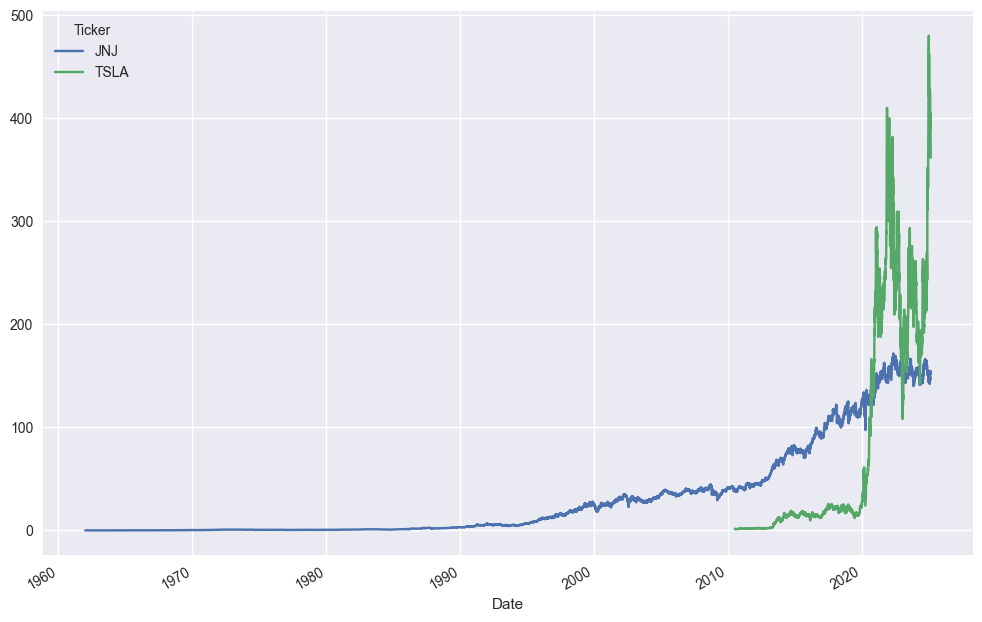

In [113]:
df.Close.plot(figsize = (12, 8))
plt.show()

In [114]:
df = df.swaplevel(axis = "columns").sort_index(axis = "columns")
df

Ticker             JNJ                                                \
Price            Close Dividends        High         Low        Open   
Date                                                                   
1962-01-02    0.062519       0.0    0.062519    0.062195    0.000000   
1962-01-03    0.061547       0.0    0.061871    0.061547    0.000000   
1962-01-04    0.060899       0.0    0.061871    0.060899    0.000000   
1962-01-05    0.059927       0.0    0.060413    0.059927    0.000000   
1962-01-08    0.058956       0.0    0.059441    0.058956    0.000000   
...                ...       ...         ...         ...         ...   
2025-02-03  151.869995       0.0  152.470001  150.779999  152.000000   
2025-02-04  153.490005       0.0  154.179993  150.949997  151.360001   
2025-02-05  154.690002       0.0  154.729996  153.309998  153.820007   
2025-02-06  153.509995       0.0  154.839996  153.380005  154.789993   
2025-02-07  153.119995       0.0  154.490005  152.800003  153.529999   

Ticker                                  TSLA                        \
Price      Stock Splits   Volume       Close Dividends        High   
Date                                                                 
1962-01-02          0.0        0         NaN       NaN         NaN   
1962-01-03          0.0   345600         NaN       NaN         NaN   
1962-01-04          0.0   216000         NaN       NaN         NaN   
1962-01-05          0.0   129600         NaN       NaN         NaN   
1962-01-08          0.0   172800         NaN       NaN         NaN   
...                 ...      ...         ...       ...         ...   
2025-02-03          0.0  6687500  383.679993       0.0  389.170013   
2025-02-04          0.0  9645000  392.209991       0.0  394.000000   
2025-02-05          0.0  8947000  378.170013       0.0  388.390015   
2025-02-06          0.0  7418100  374.320007       0.0  375.399994   
2025-02-07          0.0  6204200  361.619995       0.0  380.549988   

Ticker                                                       
Price              Low        Open Stock Splits      Volume  
Date                                                         
1962-01-02         NaN         NaN          NaN         NaN  
1962-01-03         NaN         NaN          NaN         NaN  
1962-01-04         NaN         NaN          NaN         NaN  
1962-01-05         NaN         NaN          NaN         NaN  
1962-01-08         NaN         NaN          NaN         NaN  
...                ...         ...          ...         ...  
2025-02-03  374.359985  386.679993          0.0  93732100.0  
2025-02-04  381.399994  382.630005          0.0  57072200.0  
2025-02-05  375.529999  387.510010          0.0  57223300.0  
2025-02-06  363.179993  373.029999          0.0  77918200.0  
2025-02-07  360.339996  370.190002          0.0  69494500.0  

[15883 rows x 14 columns]

In [115]:
jnj = df.JNJ
jnj

Price,Close,Dividends,High,Low,Open,Stock Splits,Volume
Date,,,,,,,
1962-01-02,0.062519,0.0,0.062519,0.062195,0.000000,0.0,0
1962-01-03,0.061547,0.0,0.061871,0.061547,0.000000,0.0,345600
1962-01-04,0.060899,0.0,0.061871,0.060899,0.000000,0.0,216000
1962-01-05,0.059927,0.0,0.060413,0.059927,0.000000,0.0,129600
1962-01-08,0.058956,0.0,0.059441,0.058956,0.000000,0.0,172800
...,...,...,...,...,...,...,...
2025-02-03,151.869995,0.0,152.470001,150.779999,152.000000,0.0,6687500
2025-02-04,153.490005,0.0,154.179993,150.949997,151.360001,0.0,9645000
2025-02-05,154.690002,0.0,154.729996,153.309998,153.820007,0.0,8947000


In [116]:
jnj[["Close", "Adj Close"]].plot(figsize = (12, 8))
plt.show()

KeyError: "['Adj Close'] not in index"

__Dividends__

In [ ]:
jnj.Dividends.sum()

__Price Increase__

In [ ]:
jnj.Close.iloc[-1] - jnj.Close.iloc[0] # from Pandas v. 2.0 use iloc!

__Dividend Policy__

In [ ]:
jnj.loc[jnj.Dividends != 0].Dividends.plot()
plt.show()

In [ ]:
tsla = df.TSLA.dropna()
tsla

In [ ]:
tsla[["Close", "Adj Close"]].plot(figsize = (12, 8))
plt.show()

__Dividends__

In [ ]:
tsla.Dividends.sum()

__Price Increase__

In [ ]:
tsla.Close.iloc[-1] - tsla.Close.iloc[0]

__Dividend Policy__

In [ ]:
tsla.loc[tsla.Dividends != 0].Dividends.plot()
plt.show()

__-> JNJ is the high-dividend stock__